## Indentification of all the members of the group.
Name: Gustavo Covas

Name: Victor Möslein

## Name of the dataset
Dataset: Student Performance Data Set

## Motivation to choose this dataset
Rational for choosing this dataset: We are interested to check whether there are differences between male and female students and how do social factors relate to school performance.

## Abstract
Abstract of the dataset (describe the dataset with your own words): The dataset contains student performance data for students from two portuguese secondary schools, along with demographic and social data for each student. The performance is reported in three grades (relative to three tests) for two subjects: Portuguese and Math.  

## Questions to the dataset
Question 1: Do girls perform differently than boys? Are they better in math? What about portuguese?

Question 2: How does social and demographic status relate to school performance? What is the influence of family relations and parents education?

## EDA
Present your EDA strategy: 
First we will calculate a mean for the three grades to summarize them. Then we will plot the distribution of this mean between student sex and subjects.
Secondly we will select some features that we personally think that should influence student performance. For each feature, we will compare grades distribution between groups with the same feature value.

## Some examples of analysis/visualizations:

1) Present the mean, variance, min, median and max values for each attribute. If the dataset has too many attibutes, choose the more significant ones. Present your code and some remarks to help the understanding.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df_mat = pd.read_csv('student-mat.csv', sep=';')
df_mat['subject'] = 'mat'

df_por = pd.read_csv('student-por.csv', sep=';')
df_por['subject'] = 'por'

df = pd.concat([df_mat, df_por], axis=0)
df['Gm'] = df[['G1', 'G2', 'G3']].mean(axis=1)

We select only the numerical features, since the other features are either binary or categorical. G1, G2 and G3 are the test grades, and Gm the mean between them.

In [16]:
df[['failures', 'absences', 'G1', 'G2', 'G3', 'Gm']].describe()

failures     absences           G1           G2           G3  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      0.264368     4.434866    11.213602    11.246169    11.341954   
std       0.656142     6.210017     2.983394     3.285071     3.864796   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     9.000000     9.000000    10.000000   
50%       0.000000     2.000000    11.000000    11.000000    11.000000   
75%       0.000000     6.000000    13.000000    13.000000    14.000000   
max       3.000000    75.000000    19.000000    19.000000    20.000000   

                Gm  
count  1044.000000  
mean     11.267241  
std       3.218805  
min       1.333333  
25%       9.333333  
50%      11.333333  
75%      13.333333  
max      19.333333

2) How well distributed are the dataset in relation the each attribute. How can you visually check that? Hint: plot a histogram

Distribution of grades:
Seems like they are normally distributed, as one would expect

In [21]:
df.hist(column=['G1', 'G2', 'G3', 'Gm'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92666c1588>,
      dtype=object)

Distribution of demographic and social features:
- Age is distributed almost evenly in the range of secondary school studend ages.
- Negative attributes like failures and weekday alcohol consumption has most ocurrences in lower values.
- Health is almost evenly distributed with a peek in "very good".
- Other attributes like quality of family relations, freetime and going out with friends seem normally distributed.
- Travel time has a peak in lower values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92661796d8>,
      dtype=object)

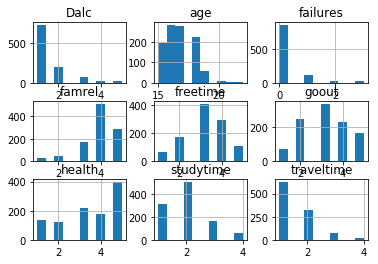

In [23]:
df.hist(column=['age', 'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime', 'traveltime', 'Dalc'])

3) Is there any attribute that can be used to better interpret the dataset? Show this in a graphic where you used this attribute to group (groupby) the data.

We present the distribution of the grades mean grouped by subject and sex. Males tend to perform better in math, while female tend to perform better in portuguese, although the difference is not that significant.

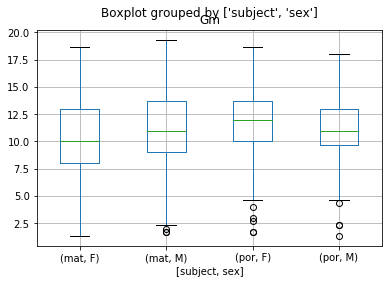

In [28]:
df.boxplot(column='Gm', by=['subject', 'sex'])

4) Is there any outlier's pattern? 

The students with higher number of failures perform below the mean:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9265c79978>,
      dtype=object)

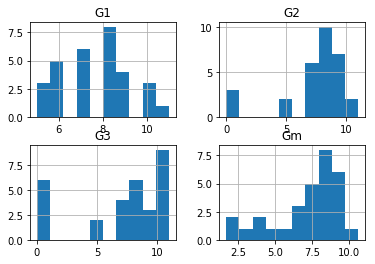

In [34]:
df[df.failures == 3].hist(column=['G1', 'G2', 'G3', 'Gm'])

5) Make your own remarks about the dataset. Try to use one or more graphics to justify your remarks.

Students with higher travel times tend to have lower grades:

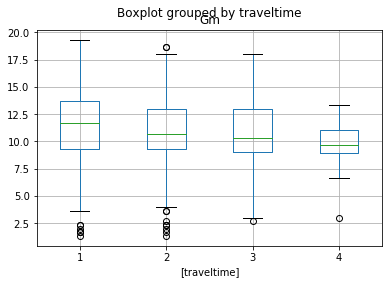

In [53]:
df.boxplot(column='Gm', by=['traveltime'])

Students in general seems to do slightly better in portuguese, although with more lower-end outliers:

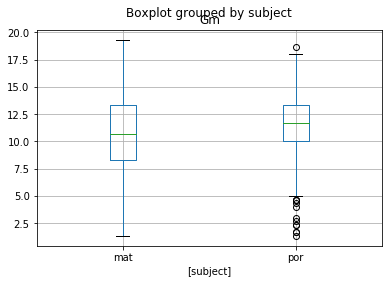

In [61]:
df.boxplot(column='Gm', by=['subject'])

There are more mothers than fathers with higher levels of education (secondary (3) and higher (4)):

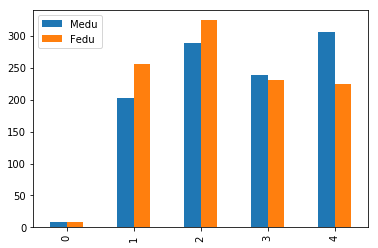

In [71]:
pd.concat([df['Medu'].value_counts(), df['Fedu'].value_counts()], axis=1).plot(kind='bar')

Quality of family relations, study time, weekday alcohol consumption, going out with friends does not seem to meaningfuly impact grades.

6) Is there any symmetry that can be stressed?

We did not find symmetry between father and mother occupation and education, as remarked above.

7) How important was EDA to help you understand the dataset?

Checking each feature distribution using histograms was helpful to get to know the dataset. We found this kind of visual analysis very powerful and easy to do.